# Исследование данных о продажах игр, оценок пользователей и экспертов, жанров и платформ.

В нашем распоряжении данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation).

**Цель исследования** - выявить определяющие успешность игры закономерности, что позволит интернет-магазину сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

*Иследование проведем по следующим этапам*:
1. Изучим содержание данных, выявим наличие данных, требующих их предобработки (неудобный тип данных, дубликаты и пропуски).
2. Проведем предобработку данных:
    - приведем к удобному формату данных;    
    - удалим дубликаты при наличии;
    - заполним пропуски значений, где это возможно;
    - добавим при необходимости дополнительные столбцы с данными.
3. Проведем исследовательский анализ данных:
    - изучим, сколько игр выпускалось в разные годы;
    - изучим продажи по платформам и определим лидеров среди них;
    - изучим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков;
    - изучим распределение игр по жанрам и определим самые прибыльные жанры;
    - определим для пользователя каждого региона (Северной Америки, Европы и Японии) самые популярные платформы, жанры игр и влияние рейтинга ESRB на продажи.
4. Проверим следующие гипотезы:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров "Action" и "Sports" разные.
5. Оформим полученные результаты.

In [1]:
# импортируем необходимые библиотеки:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

### Загрузка данных.

In [2]:
games = pd.read_csv ('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#размер исходных данных
shape_games = games.shape
shape_games

(16715, 11)

In [4]:
# наименования столбцов
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
#проверим на наличие дубликатов
games.duplicated().sum()

0

Общая информация о данных:

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
#проверим на наличие неявных дубликатов в наименовании игры
games['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [8]:
#проверим на наличие неявных дубликатов в наименовании платформы
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
#проверим на наличие неявных дубликатов в наименовании жанра
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Исходные данные содержат информацию о 16715 играх, в том числе наименование игры, наименование платформы, год выпуска, жанр игры, продажи в регионах, оценки критиков и пользователей, рейтинг от организации ESRB. Данные содержат пропуски, тип данных и наименования столбцов требуют корректировки. Дубликаты в данных не обнаружены. 

### Предобработка данных.

#### Наименования столбцов.

Наименования столбцов приведем к нижнему регистру:

In [10]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Тип данных.



Информация о столбцах выявила следующие типы данных, которые следует изменить:

1) столбец `year_of_release` имеет вещественный тип данных "float64", при этом в нем отражена информация о годе выпуска игры, т.к. годы  обозначаются целымы числами, имеет смысл поменять тип данных в этом столбце с "float64" на "int64";

2) столбец `user_score` содержит информацию об оценках пользователей, выраженных числами со значениями после запятой, поэтому данному столбцу больше подходит тип данных "float64".

Приведем типы данных в столбцах к более подходящему виду:

In [11]:
games['year_of_release'] = games['year_of_release'].astype('Int32')

In [12]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце, содержащем информацию об оценках пользователей, есть значение "tbd", котрое используется, если какая-то информация еще не определена или решение по вопросу не принято. Значит, оценка по данным играм не определена, и значение можно приравнять к пропуску.

In [13]:
games['user_score'] = pd.to_numeric (games['user_score'], errors='coerce')
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


Типы данных в столбцах с информацией о годе выпуска игры и об оценке пользователей изменены на более подходящие.

#### Обработка пропущенных значений в столбцах.



Проверим количество пропущенных значений в столбцах.

In [15]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Итого получаем 2 пропуска в столбцах с наименованием игры и наименованием жанра, 269 пропусков в столбце с информацией о годе выпуска игры и достаточно большое количество пропусков в столбцах с информацией об оценках пользователей, оценках критиков и рейтинге игры.
Заполнить пропуски в столбцах с информацией об оценках пользователей, оценках критиков и рейтинге игры, используя данные в других столбцах не представляется возможным, а их удаление может привести к искажению данных, т.к. количество пропусков в каждом из этих столбцов превышает 30% исходного объема, поэтому оставим их. Пропуски в остальных столбцах обработаем.

***Пропуски в наименовании игры:***

In [16]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
games[(games['platform'] == 'GEN') & (games['year_of_release'] == 1993)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18]:
print (f'Доля строк с пропусками в наименовании игры:', {round(len(games[games['name'].isna()])/len(games)*100, 2)}, '%')

Доля строк с пропусками в наименовании игры: {0.01} %


На платформе GEN несколько разных игр 1993 года выпуска, в связи с чем логическую замену пропусков не произвести. Кроме того, в строках с пропусками в наименовании игры, пропущены также значения в наимновании жанра, оценке пользователей, оценке критиков и рейтинге. Пропуска всего 2, что составляет менее 0.1% от исходного объема данных. Таким образом удаление данных срок не приведет к серьезному искажению данных.

In [19]:
games = games.dropna(subset=['name'])
games.shape

(16713, 11)

***Пропуски в столбце с информацией о годе выпуска игры***:

Пропуски заменим на значения из строк с аналогичным наименованием игры. 

In [20]:
for name in games['name'].unique():
    games.loc[(games['name'] == name) & (games['year_of_release'].isna()), 'year_of_release'] = \
    games.loc[(games['name'] == name), 'year_of_release'].min()

In [21]:
#проверим, сколько осталось пропусков после подстановки значений
games['year_of_release'].isna().sum()

146

In [22]:
year_no = games[games['year_of_release'].isna()]
year_no['name'].unique()

array(['wwe Smackdown vs. Raw 2006', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog", 'Triple Play 99',
       'Adventure', 'Combat', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Yakuza 4', 'WarioWare: Twisted!', 'Test Drive Unlimited 2',
       'Monster Hunter 2', 'Advance Wars: Days of Ruin', 'Fishing Derby',
       'Karate', 'Circus Atari',
       'The Chronicles of Riddick: Escape from Butcher Bay',
       "Maze Craze: A Game of Cops 'n Robbers", 'Silent Hill: Homecoming',
       'Super Breakout', "Robert Ludlum's The Bourne Conspiracy",
       'NHL Slapshot', 'TERA', 'NFL GameDay 2003',
       'Harvest Moon: Save the Homeland', 'Hangman',
       "Cubix Robots for Everyone: Clash 'n' Bash",
       'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)', 'Dragster',
       'All-Star Baseball 2005', 'Slot Machine',
       'The Dukes of Hazzard II: Daisy Dukes It Out',
       'Haven: Call of the King',
       'Unreal Ch

Наименования игр 'wwe Smackdown vs. Raw 2006', 'Triple Play 99', 'NFL GameDay 2003', 'All-Star Baseball 2005', 'Tour de France 2011', 'Sega Rally 2006', 'Football Manager 2007' содержат год, который скорее всего означает год выпуска игры. Подставим эти значения в столбец с информацией о годе выпуска игры.

In [23]:
games.loc[(games['name'] == 'wwe Smackdown vs. Raw 2006') & (games['year_of_release'].isna()), 'year_of_release'] = 2006
games.loc[(games['name'] == 'Triple Play 99') & (games['year_of_release'].isna()), 'year_of_release'] = 1999
games.loc[(games['name'] == 'NFL GameDay 2003') & (games['year_of_release'].isna()), 'year_of_release'] = 2003
games.loc[(games['name'] == 'All-Star Baseball 2005') & (games['year_of_release'].isna()), 'year_of_release'] = 2005
games.loc[(games['name'] == 'Tour de France 2011') & (games['year_of_release'].isna()), 'year_of_release'] = 2011
games.loc[(games['name'] == 'Sega Rally 2006') & (games['year_of_release'].isna()), 'year_of_release'] = 2006
games.loc[(games['name'] == 'Football Manager 2007') & (games['year_of_release'].isna()), 'year_of_release'] = 2007

In [24]:
#проверим, сколько осталось пропусков после подстановки значений
games['year_of_release'].isna().sum()

138

In [25]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
1506,Adventure,2600,<NA>,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,<NA>,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,<NA>,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+
16348,Agarest Senki: Re-appearance,PS3,<NA>,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Оставшиеся пропуски не подлежат логическому заполнению, исходя из сведений в других столбцах.

In [26]:
games.isna().sum()

name                  0
platform              0
year_of_release     138
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Появление пропусков в данных может быть связано с некачественным сбором данных.

В ходе предобработки данных заполнена часть пропусков в столбце с информацией о годе выпуска, в результате чего их количество в данном столбце сократилось до 138.

#### Дополнение информацией о суммарных продажах во всех регионах.



In [27]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [28]:
games.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16177,Destiny Links,DS,2009,Role-Playing,0.0,0.0,0.01,0.0,NaN,NaN,NaN,0.01


В ходе **предобработки данных** приведены к нижнему регистру наименования столбцов для удобства их использования при написании кода, типы данных в столбцах с информацией о годе выпуска и информацией об оценках пользователей переведен в более подходящий (целочисленный в первом случае и вещественный - во втором), данные очищены от строк с пропусками в столбце с наименованием игры и заполнена часть пропусков в столбце с информацией о годе выпуска, в результате чего их количество в данном столбце сократилось с 269 до 138, а также добавлена дополнительная информация о суммарных продажах во всех регионах.


### Исследовательский анализ данных.

В ходе исследовательского анализа данных изучим следующие тенденции:
- количество игр, которые выпускались в разные годы;
- продажи по платформам с определением лидеров среди них;
- влияние на продажи внутри одной платформы отзывов пользователей и критиков;
- распределение игр по жанрам с определением самых прибыльных жанров.

#### Количество выпущенных игр по годам.



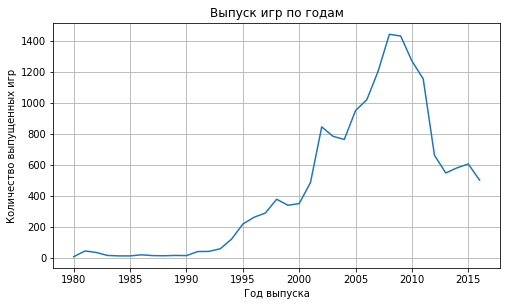

In [29]:
by_years = games.pivot_table (index='year_of_release', values='name', aggfunc='count')
by_years.plot(grid=True, legend=False, figsize=(8,4.5))
plt.title('Выпуск игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()

Судя по графику, наблюдается рост выпуска игр, начиная с 1990 года, который достигает своего пика в 2008 году (свыше 1400 игр), после чего начинается спад и к 2016 снижается до 502. До 1990 года игры выпускались равномерно в малом количестве, данный период можно не учитывать в дальнейшем исследовании.

#### Продажи в зависимости от платформы игры.



Отберем для исследования платформы с наибольшими суммарными продажами.

In [30]:
#определим платформы с наибольшими суммарными продажами
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

Наибольшие суммарные продажи у платформ PS2, X360, PS3, Wii, DS и PS.

Построим по ним распределение по годам.

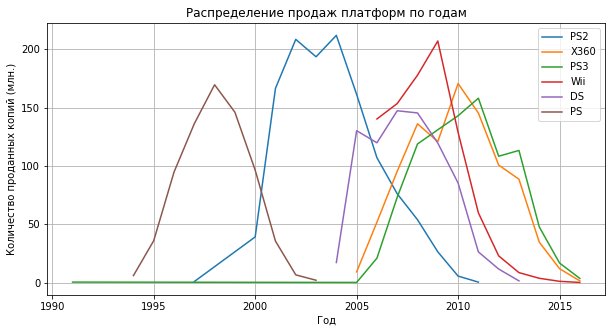

In [31]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
other_top_pl = ['X360', 'PS3', 'Wii', 'DS', 'PS']

lider = games[(games['platform'] == 'PS2') & (games['year_of_release'] > 1990)].pivot_table (index='year_of_release', values='total_sales', aggfunc='sum')
ax = lider.plot(kind='line', label='PS2', figsize = (10, 5), grid=True)

for i in other_top_pl:
    sales = games[(games['platform'] == i) & (games['year_of_release'] > 1990)].pivot_table (index='year_of_release', values='total_sales', aggfunc='sum')
    sales.plot(kind='line', ax=ax, label=i, grid=True)

plt.title('Распределение продаж платформ по годам')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий (млн.)')
plt.legend(platforms)
plt.show()

Графики наглядно показывают, что активные продажи на платформах идут около 10 лет, причем первые 5 лет продажи растут, а далее начинается спад. Лидерами продаж являются PS2 и X360. Также графики отражают, что у платформ "PS" и PS2" активные продажи закончили примерно в 2003 и 2011 годах соответственно с пиками примерно в 1997 и 2004 годах соотвественно. Несмотря на лидерство платформы "PS2" для дальнейшего анализа данные этих платформ неактуальны, поэтому исключим их из дальнейшего анализа. Сфера видеоигр достаточно быстро развивается, чтобы исключить неактуальные тренды, для дальнейшего анализа возьмем период, начиная с 2015 года, т.е. за последние 2 года.

In [32]:
# определим топ-5 платформ с наибольшими суммарными продажами по играм, выпущенным после 2014 года
games[games['year_of_release'] > 2014].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
Name: total_sales, dtype: float64

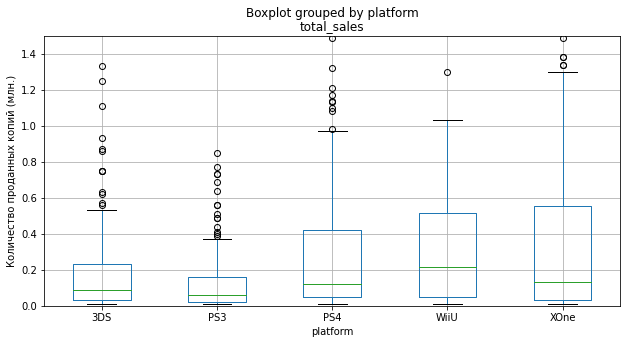

In [33]:
# построим диаграмму размаха продаж на платформах 'PS4', 'XOne', '3DS', 'WiiU', 'PS3'
(
    games[(games['platform'].isin (['PS4', 'XOne', '3DS',  'WiiU', 'PS3'])) & (games['year_of_release'] > 2014)]
    .boxplot('total_sales', by='platform', grid=True, figsize=(10, 5))
)
plt.ylim(0, 1.5)
plt.ylabel('Количество проданных копий (млн.)')
plt.show()

Данные диаграммы размаха показывают, что среди 5 лидеров последних двух лет среднемедианное значение продаж больше всего на платформе  WiiU (около 0.21 млн. проданных копий), далее идут платформы XOne (около 0.13 млн. проданных копий) и PS4 (около 0.12 млн. проданных копий), замыкают топ-5 платформы 3DS (около 0.09 млн. проданных копий) и PS3 (около 0.06 млн. проданных копий).

####  Влияние на продажи отзывов пользователей и критиков.



Для определения влияния на продажи отзывов пользователей и критиков построим диаграмму рассеивания и посчитаем коэффициент корреляции. Для иследования возьмем срез данных о продажах за последние два года на платформе с наибольшим среднемедианным значением продаж в этот период - WiiU.

***Влияние на продажи отзывов пользователей.***

Построим диаграмму рассеивания данных, характеризующию зависимость продаж от оценок пользователей (максимум 10):

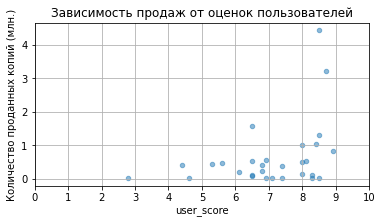

In [34]:
WiiU = games[(games['platform'] == 'WiiU') & (games['year_of_release'] > 2014)] 
WiiU.plot (x='user_score', y='total_sales', kind='scatter', figsize=(6,3), alpha=0.5, grid=True)
plt.title('Зависимость продаж от оценок пользователей')
plt.ylabel('Количество проданных копий (млн.)')
plt.yticks(range(0,5))
plt.xticks(range(0,11))
plt.show;

In [35]:
# рассчитаем коэффициент корреляции 2 факторов - общих продаж и оценок пользователей:
print('Коэффициент корреляции общих продаж и оценок пользователей =', round(WiiU['user_score'].corr(WiiU['total_sales']),4))


Коэффициент корреляции общих продаж и оценок пользователей = 0.3635


График и коэффициет корреляции показывают, что зависимость продаж от оценок пользователей присутствует, но небольшая. 

***Влияние на продажи отзывов критиков.***

Построим диаграмму рассеивания данных, характеризующию зависимость продаж от оценок критиков (максимум 100):

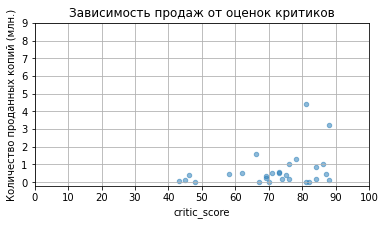

In [36]:
WiiU.plot (x='critic_score', y='total_sales', kind='scatter', figsize=(6,3), alpha=0.5, grid=True)
plt.title('Зависимость продаж от оценок критиков')
plt.ylabel('Количество проданных копий (млн.)')
plt.yticks(range(0,10))
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show;

In [37]:
# рассчитаем коэффициент корреляции 2 факторов - общих продаж и оценок критиков:
print('Коэффициент корреляции общих продаж и оценок критиков =', round(WiiU['critic_score'].corr(WiiU['total_sales']),4))

Коэффициент корреляции общих продаж и оценок критиков = 0.317


График и коэффициет корреляции показывают, что зависимость продаж от оценок критиков также присутствует, но она еще слабее, чем от оценок пользователей. 

Проверим зависимость продаж от оценок пользователей и критиков на остальных популярных платформах в последние два года.

In [38]:
pl = ['PS4', 'XOne', '3DS', 'PS3']
def korr_users (pl):
    data = games[(games['platform'] == pl) & (games['year_of_release'] > 2014)]
    k_users = round(data['user_score'].corr(data['total_sales']),4)
    return k_users
def korr_critics (pl):
    data = games[(games['platform'] == pl) & (games['year_of_release'] > 2014) & (games['critic_score'] >= 0)]
    k_critics = round(data['critic_score'].corr(data['total_sales']),4)
    return k_critics
data = {'PS4': [korr_users ('PS4'), korr_critics ('PS4')],
        'XOne': [korr_users ('XOne'), korr_critics ('XOne')],
        '3DS': [korr_users ('3DS'), korr_critics ('3DS')],
        'PS3': [korr_users ('PS3'), korr_critics ('PS3')]}
columns=['Коэффициент зависимости от оценок пользователей', 'Коэффициент зависимости от оценок критиков']            
pd.DataFrame(data, columns)

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,PS4,XOne,3DS,PS3
Коэффициент зависимости от оценок пользователей,-0.0597,-0.0415,0.1988,-0.1653
Коэффициент зависимости от оценок критиков,0.3928,0.4309,0.1776,NaN


На остальных популярных площадках за последние 2 года прослеживается также слабая зависимость продаж от оценок критиков (на платформе PS3 значение не подсчитано из-за отсутсвия данных об оценках критиков на данной платформе). Зависимость же от оценок пользователей весьма противоречива, так на платформах PS4, XOne, и PS3 видна слабая обратная зависимость, а на платформе 3DS слабая прямая зависимость.

####  Распределение игр по жанрам.



Визуализируем распределение игр по жанрам на графике.

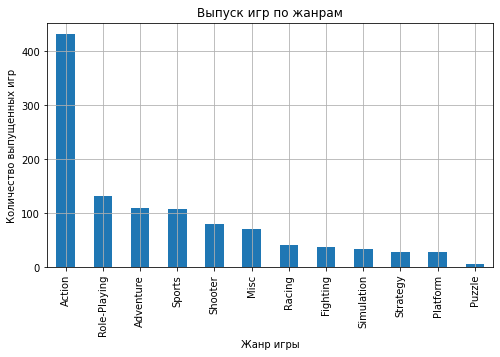

In [39]:
by_genre_count = games[games['year_of_release']>2014].pivot_table (index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
by_genre_count.plot(kind='bar' ,grid=True, legend=False, figsize=(8,4.5))
plt.title('Выпуск игр по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Количество выпущенных игр')
plt.show()

Судя по графику наибольшая популярность с весомым отрывом от конкурентов - у игр в жанре "Action" (более 400 в период с 2015 года), следующие по популярности жанры - "Role-Playing" и "Adventure" (более 100 в период с 2015 года в каждом). Меньше всего в последние два года представлены игры в жанре "Puzzle".

Визуализируем распределение продаж игр по жанрам на графике.

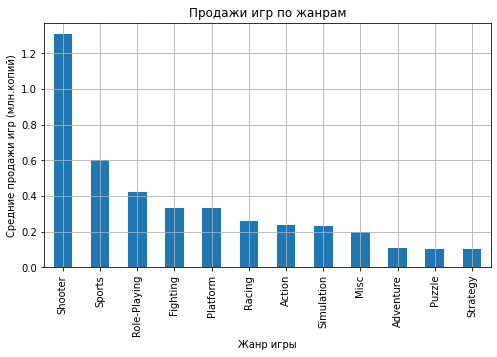

In [40]:
by_genre_sales = games[games['year_of_release']>2014].pivot_table (index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)
by_genre_sales.plot(kind='bar' ,grid=True, legend=False, figsize=(8,4.5))
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Средние продажи игр (млн.копий)')
plt.show()

Судя по графику в последние два года лучше всего продаются с весомым отрывом от конкурентов игры в жанре "Shooter" (в среднем около 1,3 млн. проданных копий), на втором месте - игры в жанре "Sports" (в среднем около 0,6 млн. проданных копий) и на третьем месте - игры в жанре "Role-Playing" (в среднем около 0,42 млн. проданных копий). Меньше всего продаж у игр в жанрах "Adventure", "Puzzle" и "Strategy" (в среднем около 0,1 млн. проданных копий в каждом).

В ходе **исследовательского анализа** выявлено, что:
- с 1990 начался рост выпуска игр, который достиг своего пика в 2008 году, после чего начался спад;
- активные продажи на платформах идут около 10 лет, достигая своего пика примерно через 5 лет, после чего начинается спад;
- лидером продаж в последние 2 года является платформа PS4;
- прослеживается слабая зависимость продаж от оценок пользователей и более выраженная зависимость продаж от оценок критиков;
- в последние 2 года больше всего выпущено игр в жанре "Action" (более 400), в жанре "Role-Playing" и "Adventure" (более 100 в каждом), меньше всего выпускались игры в жанре "Puzzle";
- в последние 2 года лучше всего в среднем продаются игры в жанре "Shooter" (в среднем около 1,3 млн. проданных копий), на втором месте - игры в жанре "Sports" (в среднем около 0,6 млн. проданных копий) и на третьем месте - игры в жанре "Role-Playing" (в среднем около 0,42 млн. проданных копий), меньше всего продаж у игр в жанрах "Adventure", "Puzzle" и "Strategy" (в среднем около 0,1 млн. проданных копий в каждом).

### Портреты пользователей Северной Америки, Европы и Японии.

####  Самые популярные платформы (топ-5) у пользователей Северной Америки, Европы и Японии. 

In [41]:
print('Топ-5 популярных платформ у пользователей Северной Америки:')
top5_platform_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_platform_na

Топ-5 популярных платформ у пользователей Северной Америки:


,platform,na_sales
0,X360,602.47
1,PS2,583.84
2,Wii,496.90
3,PS3,393.49
4,DS,382.40


In [42]:
print('Топ-5 популярных платформ у пользователей Европы:')
top5_platform_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_platform_eu

Топ-5 популярных платформ у пользователей Европы:


,platform,eu_sales
0,PS2,339.29
1,PS3,330.29
2,X360,270.76
3,Wii,262.21
4,PS,213.61


In [43]:
print('Топ-5 популярных платформ у пользователей Японии:')
top5_platform_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_platform_jp

Топ-5 популярных платформ у пользователей Японии:


,platform,jp_sales
0,DS,175.57
1,PS,139.82
2,PS2,139.20
3,SNES,116.55
4,3DS,100.67


In [44]:
#объединим таблицы:
top5_platform_region = top5_platform_na.merge(top5_platform_eu, on='platform', how='outer')
top5_platform_region = top5_platform_region.merge(top5_platform_jp, on='platform', how='outer')
top5_platform_region

,platform,na_sales,eu_sales,jp_sales
0,X360,602.47,270.76,NaN
1,PS2,583.84,339.29,139.20
2,Wii,496.90,262.21,NaN
3,PS3,393.49,330.29,NaN
4,DS,382.40,NaN,175.57
5,PS,NaN,213.61,139.82
6,SNES,NaN,NaN,116.55
7,3DS,NaN,NaN,100.67


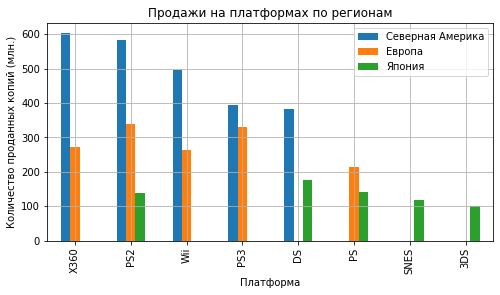

In [45]:
top5_platform_region.plot (kind='bar', x='platform', figsize=(8, 4), grid=True)
plt.title('Продажи на платформах по регионам')
plt.legend(['Северная Америка', 'Европа','Япония'])
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий (млн.)')
plt.show();

In [46]:
print(
    'Суммарные продажи игр на топ-5 платформах Северной Америки:', 
    round(top5_platform_region['na_sales'].sum(), 2), ' млн.копий;',
    round(top5_platform_region['na_sales'].sum() * 100 /(top5_platform_region['na_sales'].sum() + top5_platform_region['eu_sales'].sum() + top5_platform_region['jp_sales'].sum()), 2),
    '%'
)
print(
    'Суммарные продажи игр на топ-5 платформах Европы:', 
    round(top5_platform_region['eu_sales'].sum(), 2), ' млн.копий;',
    round(top5_platform_region['eu_sales'].sum() * 100 /(top5_platform_region['na_sales'].sum() + top5_platform_region['eu_sales'].sum() + top5_platform_region['jp_sales'].sum()), 2),
    '%'
)
print(
    'Суммарные продажи игр на топ-5 платформах Японии:', 
    round(top5_platform_region['jp_sales'].sum(), 2), 'млн.копий;',
    round(top5_platform_region['jp_sales'].sum() * 100 /(top5_platform_region['na_sales'].sum() + top5_platform_region['eu_sales'].sum() + top5_platform_region['jp_sales'].sum()), 2),
    '%'
)

Суммарные продажи игр на топ-5 платформах Северной Америки: 2459.1  млн.копий; 54.08 %
Суммарные продажи игр на топ-5 платформах Европы: 1416.16  млн.копий; 31.14 %
Суммарные продажи игр на топ-5 платформах Японии: 671.81 млн.копий; 14.77 %


Ниболее популярными платформами являются:
- в Северной Америке - X360, PS2, Wii, PS3	и DS;
- в Европе - PS2, PS3, X360, Wii и PS;
- в Японии - DS, PS, PS2, SNES	и	3DS.

Сильнее всего отличаются потребители Японии. Так если у потребителей Северной Америки и Европы совпадают 4 платформы из 5 в топ-5 платформ, то у потребителей Японии только по 2 совпадения с каждым из этих регионов и 2 платформы представлены только в топ-5 платформ пользователей Японии (SNES	и	3DS).

Самые большие продажи игр на 5 самых популярных платформах в Северной Америке (около  2.5 млрд.копий, что составляет 54.08 % от общих продаж на топ-5 платформах Северной Америки, Европы и Японии), на втором месте - продажи в Европе (около 1.4 млрд. копий и 31.14% от общих продаж на топ-5 платформах 3 регионов) и на третьем - в Японии (около 0.7 млрд.копий и 14.77% от общих продаж на топ-5 платформах 3 регионов). 



####  Самые популярные жанры (топ-5)  у пользователей Северной Америки, Европы и Японии. 

In [47]:
print('Топ-5 популярных жанров у пользователей Северной Америки:')
top5_genres_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_genres_na

Топ-5 популярных жанров у пользователей Северной Америки:


,genre,na_sales
0,Action,879.01
1,Sports,684.43
2,Shooter,592.24
3,Platform,445.50
4,Misc,407.27


In [48]:
print('Топ-5 популярных жанров у пользователей Европы:')
top5_genres_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_genres_eu

Топ-5 популярных жанров у пользователей Европы:


,genre,eu_sales
0,Action,519.13
1,Sports,376.79
2,Shooter,317.34
3,Racing,236.51
4,Misc,212.74


In [49]:
print('Топ-5 популярных жанров у пользователей Японии:')
top5_genres_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_genres_jp

Топ-5 популярных жанров у пользователей Японии:


,genre,jp_sales
0,Role-Playing,355.41
1,Action,161.43
2,Sports,135.54
3,Platform,130.83
4,Misc,108.11


In [50]:
#объединим таблицы:
top5_genres_region = top5_genres_na.merge(top5_genres_eu, on='genre', how='outer')
top5_genres_region = top5_genres_region.merge(top5_genres_jp, on='genre', how='outer')
top5_genres_region

,genre,na_sales,eu_sales,jp_sales
0,Action,879.01,519.13,161.43
1,Sports,684.43,376.79,135.54
2,Shooter,592.24,317.34,NaN
3,Platform,445.50,NaN,130.83
4,Misc,407.27,212.74,108.11
5,Racing,NaN,236.51,NaN
6,Role-Playing,NaN,NaN,355.41


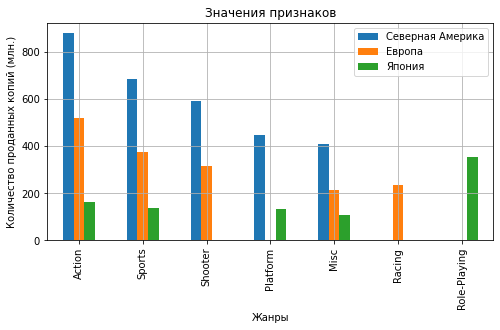

In [51]:
top5_genres_region.plot (kind='bar', x='genre', figsize=(8, 4), grid=True)
plt.title('Значения признаков')
plt.legend(['Северная Америка', 'Европа','Япония'])
plt.xlabel('Жанры')
plt.ylabel('Количество проданных копий (млн.)')
plt.show();

Ниболее популярными жанрами игр являются:
- в Северной Америке - Action, Sports, Shooter, Platform и Misc;
- в Европе - Action, Sports, Shooter, Racing и Misc;
- в Японии - Role-Playing, Action, Sports, Platform и Misc.

Среди жанров различий в содержании топ-5 уже меньше. Так у потребителей Северной Америки и Европы полностью совпадают 4 жанра из 5, в том числе и по позицияи в рейтинге, за исключением 4 позиции (в Северной Америке это жанр Platform, а в Европе - Racing). У пользователей Японии больше совпадений с пользователями Северной Америки (4 позиции в рейтинге), вместе с тем у пользователей Японии наибольшую популярность имеет жанр Role-Playing, который отсутствует в топ-5 жанров игр Северной Америки и Европы. Также пользователи из Японии не проявляют интереса к играми в жанре Shooter, популярном в остальных 2 регионах, и Racing, популярном в Европе. Различия в предпочтениях пользователей из разных регионах вероятно связаны с их национальными особенностями и принятыми традиционными устоями соответствующих регионов.

####  Влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии.



In [52]:
#выведем значения рейтингов ESRB
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [53]:
print('Топ-5 рейтингов ESRB у пользователей Северной Америки:')
top5_rating_na = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_rating_na

Топ-5 рейтингов ESRB у пользователей Северной Америки:


,rating,na_sales
0,E,1292.99
1,T,759.75
2,M,748.48
3,E10+,353.32
4,K-A,2.56


In [54]:
print('Топ-5 рейтингов ESRB у пользователей Европы:')
top5_rating_eu = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_rating_eu

Топ-5 рейтингов ESRB у пользователей Европы:


,rating,eu_sales
0,E,710.25
1,M,483.97
2,T,427.03
3,E10+,188.52
4,AO,0.61


In [55]:
print('Топ-5 рейтингов ESRB у пользователей Японии:')
top5_rating_jp = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
top5_rating_jp

Топ-5 рейтингов ESRB у пользователей Японии:


,rating,jp_sales
0,E,198.11
1,T,151.40
2,M,64.24
3,E10+,40.20
4,K-A,1.46


In [56]:
#объединим таблицы:
top5_rating_region = top5_rating_na.merge(top5_rating_eu, on='rating', how='outer')
top5_rating_region = top5_rating_region.merge(top5_rating_jp, on='rating', how='outer')
top5_rating_region

,rating,na_sales,eu_sales,jp_sales
0,E,1292.99,710.25,198.11
1,T,759.75,427.03,151.40
2,M,748.48,483.97,64.24
3,E10+,353.32,188.52,40.20
4,K-A,2.56,NaN,1.46
5,AO,NaN,0.61,NaN


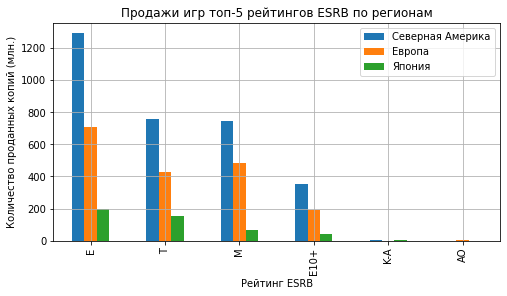

In [57]:
top5_rating_region.plot (kind='bar', x='rating', figsize=(8, 4), grid=True)
plt.title('Продажи игр топ-5 рейтингов ESRB по регионам')
plt.legend(['Северная Америка', 'Европа','Япония'])
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий (млн.)')
plt.show();

Топ-5 рейтингов ESRB игр являются:
- в Северной Америке - E, T, M, E10+ и K-A;
- в Европе - E, M, T, E10+ и AO;
- в Японии - E, T, M, E10+ и K-A.

Во всех 3 регионах самую большую категорию составляют продажи игр с рейтингом ESRB, равным "E", т.е. подходящим для всех возрастных категорий. На втором месте в Северной Америке и Японии рейтинг ESRB, равный "T", т.е. для лиц старше 13 лет, на третьем - рейтинг ESRB, равный "M", т.е. для лиц старше 17 лет. В Европе, наоборот, на втором месте - игры с рейтингом ESRB, равным "M", на третьем - игры с рейтингом ESRB, равным "T". На 4 месте во всех 3 регионах - игры с рейтингом ESRB, равным E10+, т.е. для лиц старше 10 лет. На 5 месте в Северной Америке и Японии рейтинг ESRB, равный "K-A", т.е. для детей (аналогичен "E"), в Европе - рейтинг ESRB, равный "AO", т.е. для взрослых старше 18 лет.

### Проверка гипотез.

Перейдем к проверке гипотез.

####  **Гипотеза № 1**: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.



Сформулируем нулевую гипотезу H0 как равенство пользовательских рейтингов платформ Xbox One и PC. Альтернативную гипотезу H1 определим как пользовательские рейтинги платформы Xbox One не равны пользовательским рейтингам платформы PC (двусторонняя гипотеза). Пользовательские рейтинги 2 платформ представляют собой 2 независимые выборки, поэтому для проверки гипотезы № 1 проведем двухвыборочный t-test для независимых выборок.

In [58]:
# уровень статистической значимости зададим = 5%
alpha = 0.05
xbox = games[(games['platform'] == 'XB') & (games['user_score'] >= 0)]
pc = games[(games['platform'] == 'PC') & (games['user_score'] >= 0)]
xbox_users_score = xbox ['user_score']
pc_users_score = pc ['user_score']
print (f'Средняя оценка пользователей платформы Xbox: {np.mean(xbox_users_score)}')
print (f'Средняя оценка пользователей платформы PC: {np.mean(pc_users_score)}')
results = st.ttest_ind(xbox_users_score, pc_users_score)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу. Гипотеза № 1 опровергнута - средние пользовательские рейтинги платформ Xbox One и PC не одинаковы.')
else:
    print ('Не получилось отвергнуть нулевую гипотезу. Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.')

Средняя оценка пользователей платформы Xbox: 7.500511945392492
Средняя оценка пользователей платформы PC: 7.062467532467533
p-value: 1.7410111940926518e-07
Отвергаем нулевую гипотезу. Гипотеза № 1 опровергнута - средние пользовательские рейтинги платформ Xbox One и PC не одинаковы.


**Вывод № 1:** гипотеза № 1 отвергается - более вероятно, что средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

####  **Гипотеза № 2**: средние пользовательские рейтинги жанров Action и Sports разные.


Сформулируем нулевую гипотезу H0 как равенство пользовательских рейтингов жанров Action и Sports. Альтернативную гипотезу H1 (проверяемую гипотезу № 2) определим как пользовательские рейтинги жанров Action не равны пользовательским рейтингам жанров Sports (двусторонняя гипотеза). Пользовательские рейтинги 2 жанров игр представляют собой 2 независимые выборки, поэтому для проверки гипотезы № 2 также проведем двухвыборочный t-test для независимых выборок.

In [59]:
# уровень статистической значимости зададим = 5%
alpha = 0.05
action = games[(games['genre'] == 'Action') & (games['user_score'] >= 0)]
sports = games[(games['genre'] == 'Sports') & (games['user_score'] >= 0)]
action_users_score = action ['user_score']
sports_users_score = sports ['user_score']
print (f'Средняя оценка пользователей игр жанра Action: {np.mean(action_users_score)}')
print (f'Средняя оценка пользователей игр жанра Sports: {np.mean(sports_users_score)}')
results = st.ttest_ind(action_users_score, sports_users_score)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу. Гипотеза № 2 не опровергнута - средние пользовательские рейтинги жанров Action и Sports разные.')
else:
    print ('Не получилось отвергнуть нулевую гипотезу. Cредние пользовательские рейтинги жанров Action и Sports одинаковые.')

Средняя оценка пользователей игр жанра Action: 7.054043715846995
Средняя оценка пользователей игр жанра Sports: 6.961196736174069
p-value: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу. Cредние пользовательские рейтинги жанров Action и Sports одинаковые.


**Вывод № 2:** гипотеза № 2 отвергается - более вероятно, что средние пользовательские рейтинги игр жанров Action и Sports одинаковые.

### Итоговые выводы.

**Исходные данные:** в ходе исследования был проведен анализ данных из открытых источников о продажах игр, их оценках пользователями и экспертами, жанров и платформ.

Исходные данные включают в себя информацию о 16715 играх, в том числе наименование игры, наименование платформы, год выпуска, жанр игры, продажи в регионах, оценки критиков и пользователей, рейтинги от организации ESRB. В ходе предобработки данных приведены к нижнему регистру наименования столбцов для удобства их использования при написании кода, типы данных в столбцах с информацией о годе выпуска и информацией об оценках пользователей переведен в более подходящий (целочисленный в первом случае и вещественный - во втором), данные очищены от 2 неинформативных строк с пропусками в столбцах с наименованием игры и наименованием жанра, заполнена часть пропусков в столбце с информацией о годе выпуска, в результате чего их количество в данном столбце сократилось с 269 до 138, а также добавлена дополнительная информация о суммарных продажах во всех регионах для удобства последующего анализа. Также данные содержат существенное количество пропусков в столбцах с оценками пользователей, оценками критиков и рейтингами ESRB, которые не удалось устранить.

**Цель исследования** - выявить определяющие успешность игры закономерности, что позволит интернет-магазину «Стримчик» сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
В ходе проведенного **исследования** выявлено, что:
- с 1990 начался рост выпуска игр, который достиг своего пика в 2008 году, после чего начался спад;
- активные продажи на платформах идут около 10 лет, достигая своего пика примерно через 5 лет, после чего начинается спад;
- лидером продаж в последние 2 года является платформа PS4;
- прослеживается слабая зависимость продаж от оценок пользователей и более выраженная зависимость продаж от оценок критиков;
- в последние 2 года больше всего выпущено игр в жанре "Action" (более 400), в жанре "Role-Playing" и "Adventure" (более 100 в каждом), меньше всего выпускались игры в жанре "Puzzle";
- в последние 2 года лучше всего в среднем продаются игры в жанре "Shooter" (в среднем около 1,3 млн. проданных копий), на втором месте - игры в жанре "Sports" (в среднем около 0,6 млн. проданных копий) и на третьем месте - игры в жанре "Role-Playing" (в среднем около 0,42 млн. проданных копий), меньше всего продаж у игр в жанрах "Adventure", "Puzzle" и "Strategy" (в среднем около 0,1 млн. проданных копий в каждом).

**Анализ портретов пользователей** Северной Америки, Европы и Японии показал, что:
1. Самые выгодным рынком по объему продаж на 5 самых популярных платформах является рынок Северной Америки (54.08 % от общих продаж на топ-5 платформах Северной Америки, Европы и Японии), на втором месте - продажи в Европе (31.14% от общих продаж на топ-5 платформах 3 регионов) и на третьем - продажи в Японии (14.77% от общих продаж на топ-5 платформах 3 регионов).
2. Топ-5 популярных платформ в Северной Америке - X360, PS2, Wii, PS3 и DS; в Европе - PS2, PS3, X360, Wii и PS; в Японии -  DS, PS, PS2 и непопулярные в 2 других регионах SNES и 3DS. Топ-5 популярных платформ Японии отличается от более схожих между собой топ-5 популярнях платформ Северной Америки и Европы.
3. Наиболее популярными жанрами в Северной Америке и Европе является жанр Action, в Японии - Role-Playing (не представлен в рейтинге 5 популярных жанров у пользователей других 2 регионов), жанр Action в Японии на втором месте по популярности. Также достатоточно популярны во всех 3 регионах жанры Sports (2 место по популярности в Северной Америке и Европе, 3 - в Японии) и Misc (5 место во всех 3 регионах). В Европе также популярен жанр Racing (не представлен в рейтинге 5 популярных жанров у пользователей других 2 регионов), в Северной Америке и Европе - жанр Shooter (не попал в топ-5 Японии), в Северной Америке и Японии - жанр Platform (не попал в топ-5 Европы).
4. Самыми популярными играми во всех 3 регионах являются игры с рейтингом ESRB, равным "E", т.е. для всех возрастных категорий. Существенно отстают в рейтинге топ-5 игры с рейтингом ESRB, равным  "T", т.е. для лиц старше 13 лет, (2 место в рейтинге Северной Америки и Японии, 3 - в европейском рейтинге) и "M", т.е. для лиц старше 17 лет, (3 место в рейтинге Северной Америки и Японии, 2 - в европейском рейтинге). На 4 месте во всех 3 регионах - игры с рейтингом ESRB, равным E10+, т.е. для лиц старше 10 лет. Остальные рейтинги несущественны.

**Проверка гипотез:**

В ходе исследования были проверены 2 гипотезы.

**Гипотеза № 1**, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, отвергнута - более вероятно, что средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

**Гипотеза № 2**, что средние пользовательские рейтинги жанров Action и Sports разные отвергнута - более вероятно, средние пользовательские рейтинги жанров Action и Sports одинаковые.

Проверки обеих гипотез указывают на то, что не стоит ориентироваться на оценки пользователей.

***Рекомендации:***
1. Тщательнее собирать данные для анализа для получения более точных результатов (минимизировать пропуски в данных).
2. Направить основные усилия на продвижение в регионе Северной Америке, как наиболее прибыльном с точки зрения объемов продаж.
3. Увеличить долю игр в жанрах "Shooter", "Sports" и "Role-Playing", как наиболее продаваемых, и уменьшить долю игр в жанрах "Adventure", "Puzzle" и "Strategy", как наименее продаваемых.
4. Увеличить долю игр на платформе PS4, являющуюся лидером продаж в последние два года.
5. Увеличить долю игр, подходящих для всех возрастов, как наиболее продаваемых.
5. При формировании стратегии закупок и рекламных компаний:
- учитывать срок активной деятельности платформ, исходя из того, что средний срок активной деятельности платформ составляет 10 лет с пиком через 5 лет и дальнейшим спадом;
- учитывать оценки критиков (не является определяющим фактором);
- учитывать региональные особенности: 
    - в Японии наиболее продаваемыми являются игры в жанре Role-Playing, непопулярные в других регионах;
    - платформы SNES и 3DS также популярны в Японии и непопулярны в других регионах;
    - в Европе наряду с жанрами Action и Sports также популярен жанр Racing и т.д. 
    